In [130]:
import pandas as pd
import numpy as np
from warnings import warn
import dask.dataframe as dd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', '{:.2f}'.format)

In [131]:
with open(r'C:\Users\Chamo\Desktop\Python\mis_paquetes\Proyecto_movie\TMDB_movie_dataset_v11.csv', 'r') as tmdb:
    for i in range(3):                 # esta delimitado por "," 
        print(tmdb.readline())

"id","title","vote_average","vote_count","status","release_date","revenue","runtime","adult","backdrop_path","budget","homepage","imdb_id","original_language","original_title","overview","popularity","poster_path","tagline","genres","production_companies","production_countries","spoken_languages","keywords"

"27205","Inception","8.364","34495","Released","2010-07-15","825532764","148","False","/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg","160000000","https://www.warnerbros.com/movies/inception","tt1375666","en","Inception","Cobb, a skilled thief who commits corporate espionage by infiltrating the subconscious of his targets is offered a chance to regain his old life as payment for a task considered to be impossible: ""inception"", the implantation of another person's idea into a target's subconscious.","83.952","/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg","Your mind is the scene of the crime.","Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pictures","United Kingdom, United 

In [132]:
df_tmdb = dd.read_csv(r'C:\Users\Chamo\Desktop\Python\mis_paquetes\Proyecto_movie\TMDB_movie_dataset_v11.csv',\
                      sep=',', na_values='\\N', low_memory=False)

In [133]:
df_tmdb.head(3)

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.36,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,160000000,https://www.warnerbros.com/movies/inception,tt1375666,en,Inception,"Cobb, a skilled thief who commits corporate es...",83.95,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.42,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,165000000,http://www.interstellarmovie.net/,tt0816692,en,Interstellar,The adventures of a group of explorers who mak...,140.24,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.51,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,185000000,https://www.warnerbros.com/movies/dark-knight/,tt0468569,en,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.64,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."


In [134]:
df_tmdb.shape[0].compute()

1050797

In [135]:
df_tmdb = df_tmdb.compute() # Combierto a df de pandas 

In [136]:
type(df_tmdb)

pandas.core.frame.DataFrame

In [137]:
# Solo me quedo con lo balores en bugget y revenue mayores a 0.
df_tmdb = df_tmdb[(df_tmdb['budget']>0) & (df_tmdb['revenue']>0)] 


In [138]:
df_tmdb.shape[0]

13542

In [139]:
# uso estadistica para crear una columna con el ROI de las producciones.
df_tmdb['roi'] = (df_tmdb['revenue'] - df_tmdb['budget']) / df_tmdb['budget']

In [140]:
df_tmdb.head(3)


,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords,roi
0,27205,Inception,8.36,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,160000000,https://www.warnerbros.com/movies/inception,tt1375666,en,Inception,"Cobb, a skilled thief who commits corporate es...",83.95,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc...",4.16
1,157336,Interstellar,8.42,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,165000000,http://www.interstellarmovie.net/,tt0816692,en,Interstellar,The adventures of a group of explorers who mak...,140.24,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,...",3.25
2,155,The Dark Knight,8.51,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,185000000,https://www.warnerbros.com/movies/dark-knight/,tt0468569,en,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.64,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f...",4.43


In [141]:
# Obteniendo la inforcion general para poder sacar los outliers usando los cuartiles.
# Truco: si std es 0 la columna esta llena de 0.
print("\nEstadísticas descriptivas antes de filtrar outliers:")
df_tmdb.describe()  


Estadísticas descriptivas antes de filtrar outliers:


,id,vote_average,vote_count,revenue,runtime,budget,popularity,roi
count,13542.00,13542.00,13542.00,13542.00,13542.00,13542.00,13542.00,13542.00
mean,374915.66,5.27,1129.36,52001068.12,88.56,18189736.17,14.46,299604.51
std,436012.56,2.91,2646.36,148666629.48,51.86,37172156.75,53.61,13418633.56
min,5.00,0.00,0.00,1.00,0.00,1.00,0.00,-1.00
25%,14011.25,4.84,1.00,20197.75,80.00,14039.50,0.68,-0.32
50%,136606.50,6.20,130.00,4162764.00,98.00,4000000.00,8.85,0.55
75%,656809.25,7.00,983.00,36000000.00,115.00,20000000.00,17.30,2.69
max,1303166.00,10.00,34495.00,3000000000.00,999.00,900000000.00,2994.36,999999999.00


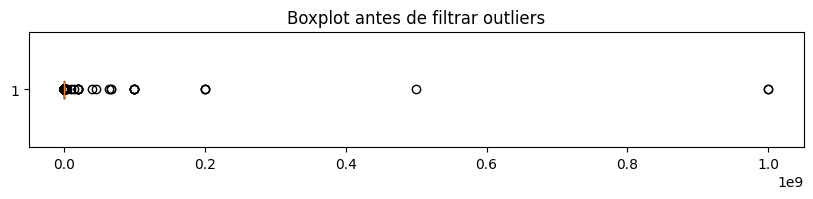

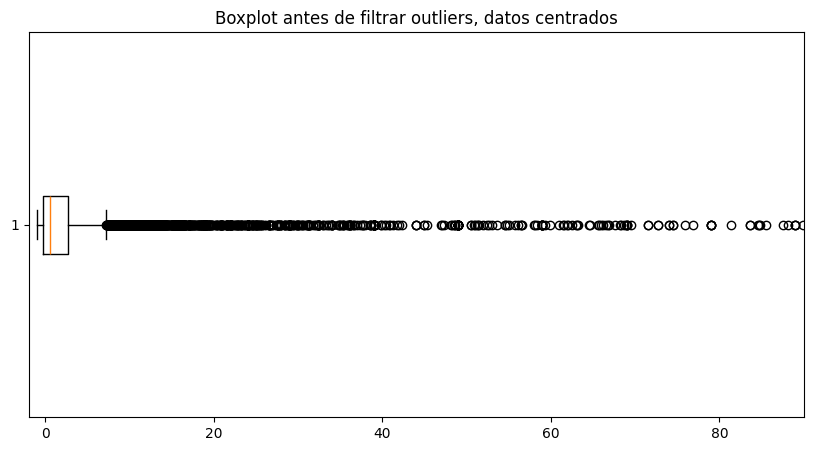

In [142]:
# visualizacion antes del filtrado de outliers
plt.figure(figsize=(10, 1.5))
plt.boxplot(df_tmdb['roi'], vert=False) # vert=False para que las cajas se alinien en el eje x 
plt.title('Boxplot antes de filtrar outliers')
plt.show()

plt.figure(figsize=(10, 5))
plt.boxplot(df_tmdb['roi'], vert=False) # vert=False para que las cajas se alinien en el eje x 
plt.title('Boxplot antes de filtrar outliers, datos centrados')
plt.xlim(-2, 90)
plt.show()


El Boxplot muestra que la mayoria de los datos estan muy concentrados cerca del valor 0,
    'pero hay una gran cantidad de valores atipicos que se estienden hasta el valor 40.
        'Esto indica que aunque los datos centrales son muy homogeneos, hay valores extremos que deben ser analizados
            'con mas detalle.'

In [144]:
# Funcion para filtral los datos atipicos usando quartiles.
def filtrar_outliers_iqr(df, column):
    """
    Filtra los outliers de un DataFrame usando el método del rango intercuartílico (IQR).
    
    Parameters:
    df_tmdb: El DataFrame del cual se filtrarán los outliers.
    roi: El nombre de la columna donde se buscarán los outliers.

    Returns:
    df_tmdb: retorna DataFrame Dask sin los outliers.
    
    """
    #Computar los quartile Q1 y Q3
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    
    # Crear el Rango 
    IQR = Q3 - Q1 
    
    #Definir el limite Inferior y Superior
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    return df[(df[column] >= lower) & (df[column] <= upper)]

In [145]:
# Creando DF sin outliers.
df_tmdb_no_outliers = filtrar_outliers_iqr(df_tmdb, 'roi')

In [146]:
df_tmdb_no_outliers.shape   # borro 1555 datos que eran atipicos.

(11986, 25)

In [147]:
print("\nEstadísticas descriptivas después de filtrar outliers:")
df_tmdb_no_outliers.describe()


Estadísticas descriptivas después de filtrar outliers:


,id,vote_average,vote_count,revenue,runtime,budget,popularity,roi
count,11986.00,11986.00,11986.00,11986.00,11986.00,11986.00,11986.00,11986.00
mean,367792.01,5.27,1047.50,45329664.49,88.98,19668046.36,14.05,0.88
std,431576.42,2.86,2456.58,127392388.29,51.38,38570264.78,52.69,1.80
min,5.00,0.00,0.00,1.00,0.00,1.00,0.00,-1.00
25%,14195.25,4.93,1.00,15666.00,81.00,30000.00,0.78,-0.44
50%,123609.00,6.18,134.00,3673997.50,99.00,5000000.00,8.96,0.24
75%,629500.00,6.96,933.00,31424535.25,115.00,22000000.00,16.88,1.66
max,1303040.00,10.00,34495.00,3000000000.00,999.00,900000000.00,2994.36,7.21


In [113]:
 '''
 DataFrame con los outliers de la conluna roi
Q1 = df_tmdb['roi'].quantile(0.25)
Q3 = df_tmdb['roi'].quantile(0.75)
    
    Crear el Rango 
IQR = Q3 - Q1 
    
   Definir el limite Inferior y Superior
lower_roi = Q1 - 1.5 * IQR
upper_roi = Q3 + 1.5 * IQR

Outliers_roi = df_tmdb[(df_tmdb['roi']<lower_roi) | (df_tmdb['roi']>upper_roi)]
 Outliers_roi guardo este df que contiene los outliers de la columna roi del df df_tmdb
 '''

"\nDataFrame con los outliers de la conluna roi\nQ1 = df_tmdb['roi'].quantile(0.25)\nQ3 = df_tmdb['roi'].quantile(0.75)\n   \n   Crear el Rango \nIQR = Q3 - Q1 \n   \n  Definir el limite Inferior y Superior\nlower_roi = Q1 - 1.5 * IQR\nupper_roi = Q3 + 1.5 * IQR\n\nOutliers_roi = df_tmdb[(df_tmdb['roi']<lower_roi) | (df_tmdb['roi']>upper_roi)]\nOutliers_roi guardo este df que contiene los outliers de la columna roi del df df_tmdb\n"

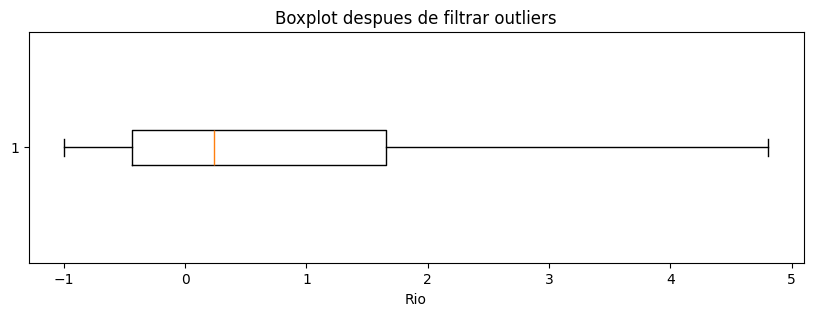

In [148]:
'''
Creo una linea roja con el limite del cuartir Q1 y Q3 antes de eliminar
los Datos Atipicos, [ara poder identificar el rango de los outliers 
Q1 = df_tmdb['roi'].quantile(0.25)
Q3 = df_tmdb['roi'].quantile(0.75)
IQR = Q3 - Q1
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR
'''

# visualizacion despues del filtrado de outliers
plt.figure(figsize=(10, 3))
plt.boxplot(df_tmdb_no_outliers['roi'], vert=False, showfliers=False) # vert=False para que la esta en el eje x

plt.title('Boxplot despues de filtrar outliers')
plt.xlabel('Rio')

# Añadir líneas verticales para los límites originales de los bigotes
#plt.axvline(x=lower_whisker, color='r', linestyle='--')
#plt.axvline(x=upper_whisker, color='r', linestyle='--')


plt.show()

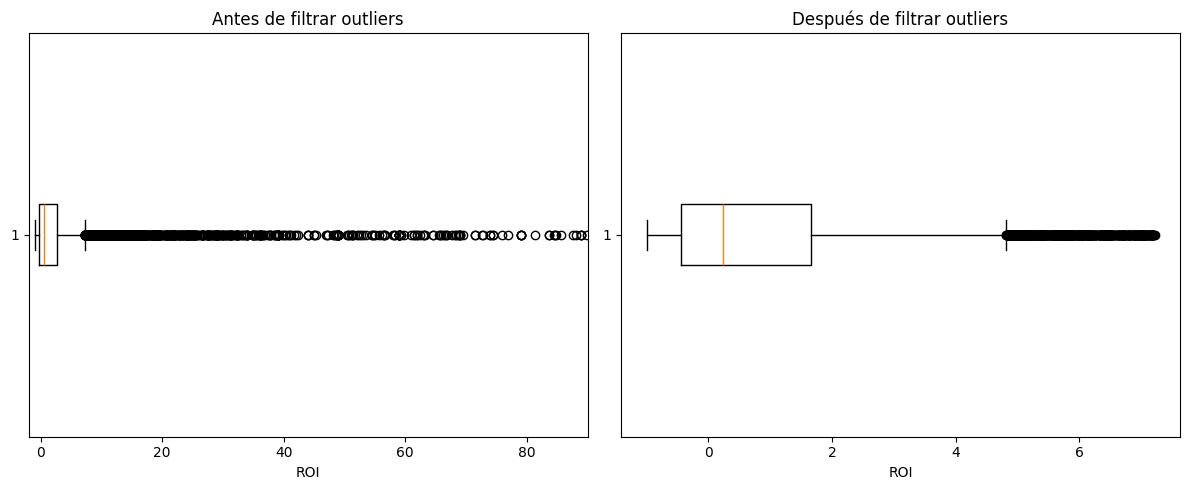

In [149]:
# Uso axes para  encasular los boxplot en una misma figura como columna 1 y 2 
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Boxplot antes de filtrar outliers
axes[0].boxplot(df_tmdb['roi'], vert=False)  # Crear el boxplot en el primer subplot
axes[0].set_title('Antes de filtrar outliers')  # Establecer el título del primer subplot
axes[0].set_xlabel('ROI')  # Establecer la etiqueta del eje X del primer subplot
axes[0].set_xlim(-2, 90)


# Boxplot después de filtrar outliers
axes[1].boxplot(df_tmdb_no_outliers['roi'], vert=False)  # Crear el boxplot en el segundo subplot
axes[1].set_title('Después de filtrar outliers')  # Establecer el título del segundo subplot
axes[1].set_xlabel('ROI')  # Establecer la etiqueta del eje X del segundo subplot

# Ajustar el diseño para que no se solapen los subplots
plt.tight_layout()
plt.show()

En el primer grafico podemos observar que los outliers se entienden mas aya de 80, en el segundo grafico Boxplot podemos
observar que los valores solo llegan asta 7 mas o menos. 

In [150]:
print('\nCuantos valores atipicos tiene la columna roi antes de filtras los outliers')
IQR_1 = (df_tmdb['roi'].quantile(0.75)) - (df_tmdb['roi'].quantile(0.25))
filtro_Q3 = (df_tmdb['roi'].quantile(0.75)) + 1.5 * IQR_1

result = df_tmdb[df_tmdb['roi'] > filtro_Q3]
result.shape[0]



Cuantos valores atipicos tiene la columna roi antes de filtras los outliers


1556

In [151]:
print('\nCuantos valores atipicos tiene la columna roi despues de filtras los outliers')
IQR_1 = (df_tmdb['roi'].quantile(0.75)) - (df_tmdb['roi'].quantile(0.25))
filtro_Q3 = (df_tmdb['roi'].quantile(0.75)) + 1.5 * IQR_1

result = df_tmdb_no_outliers[df_tmdb_no_outliers['roi'] > filtro_Q3]
result.shape[0]



Cuantos valores atipicos tiene la columna roi despues de filtras los outliers


0

In [152]:
df_tmdb_no_outliers.shape[0] # confitmo la cantidad de valores 

11986

In [153]:
df_tmdb_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11986 entries, 0 to 159464
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    11986 non-null  int64  
 1   title                 11986 non-null  object 
 2   vote_average          11986 non-null  float64
 3   vote_count            11986 non-null  int64  
 4   status                11986 non-null  object 
 5   release_date          10787 non-null  object 
 6   revenue               11986 non-null  int64  
 7   runtime               11986 non-null  int64  
 8   adult                 11986 non-null  bool   
 9   backdrop_path         9304 non-null   object 
 10  budget                11986 non-null  int64  
 11  homepage              3954 non-null   object 
 12  imdb_id               9731 non-null   object 
 13  original_language     11986 non-null  object 
 14  original_title        11986 non-null  object 
 15  overview              1

In [154]:
# borrar columnas no necesarias, util antes de borrar valores NaN para no reducir mucho el dataset
df_tmdb_no_outliers = df_tmdb_no_outliers.drop(['homepage', 'tagline','poster_path','overview','keywords','backdrop_path','spoken_languages','production_companies'], axis=1)

In [155]:
df_tmdb_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11986 entries, 0 to 159464
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    11986 non-null  int64  
 1   title                 11986 non-null  object 
 2   vote_average          11986 non-null  float64
 3   vote_count            11986 non-null  int64  
 4   status                11986 non-null  object 
 5   release_date          10787 non-null  object 
 6   revenue               11986 non-null  int64  
 7   runtime               11986 non-null  int64  
 8   adult                 11986 non-null  bool   
 9   budget                11986 non-null  int64  
 10  imdb_id               9731 non-null   object 
 11  original_language     11986 non-null  object 
 12  original_title        11986 non-null  object 
 13  popularity            11986 non-null  float64
 14  genres                10840 non-null  object 
 15  production_countries  1

La columna con menor valores es Imdb_id con 9731, pero es una columna mecesaria.

In [156]:
df_tmdb_no_outliers.head(2)

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,imdb_id,original_language,original_title,popularity,genres,production_countries,roi
0,27205,Inception,8.36,34495,Released,2010-07-15,825532764,148,False,160000000,tt1375666,en,Inception,83.95,"Action, Science Fiction, Adventure","United Kingdom, United States of America",4.16
1,157336,Interstellar,8.42,32571,Released,2014-11-05,701729206,169,False,165000000,tt0816692,en,Interstellar,140.24,"Adventure, Drama, Science Fiction","United Kingdom, United States of America",3.25


In [157]:
 #Eliminar valores NaN 
df_tmdb_no_outliers = df_tmdb_no_outliers.dropna()

In [158]:
df_tmdb_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9098 entries, 0 to 159173
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9098 non-null   int64  
 1   title                 9098 non-null   object 
 2   vote_average          9098 non-null   float64
 3   vote_count            9098 non-null   int64  
 4   status                9098 non-null   object 
 5   release_date          9098 non-null   object 
 6   revenue               9098 non-null   int64  
 7   runtime               9098 non-null   int64  
 8   adult                 9098 non-null   bool   
 9   budget                9098 non-null   int64  
 10  imdb_id               9098 non-null   object 
 11  original_language     9098 non-null   object 
 12  original_title        9098 non-null   object 
 13  popularity            9098 non-null   float64
 14  genres                9098 non-null   object 
 15  production_countries  90

In [159]:
# borrando valores duplicados usando imdb_id ya que son valores unicos para cada produccion.
df_tmdb_no_outliers = df_tmdb_no_outliers.drop_duplicates(subset=['imdb_id'])

In [160]:
df_tmdb_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9098 entries, 0 to 159173
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9098 non-null   int64  
 1   title                 9098 non-null   object 
 2   vote_average          9098 non-null   float64
 3   vote_count            9098 non-null   int64  
 4   status                9098 non-null   object 
 5   release_date          9098 non-null   object 
 6   revenue               9098 non-null   int64  
 7   runtime               9098 non-null   int64  
 8   adult                 9098 non-null   bool   
 9   budget                9098 non-null   int64  
 10  imdb_id               9098 non-null   object 
 11  original_language     9098 non-null   object 
 12  original_title        9098 non-null   object 
 13  popularity            9098 non-null   float64
 14  genres                9098 non-null   object 
 15  production_countries  90

In [ ]:
print(df_tmdb_no_outliers.dtypes)

id                        int64
title                    object
vote_average            float64
vote_count                int64
status                   object
release_date             object
revenue                   int64
runtime                   int64
adult                      bool
backdrop_path            object
budget                    int64
homepage                 object
imdb_id                  object
original_language        object
original_title           object
overview                 object
popularity              float64
poster_path              object
tagline                  object
genres                   object
production_companies     object
production_countries     object
spoken_languages         object
keywords                 object
roi                     float64
dtype: object


In [169]:
# Formatear los datos a su formato correspondiente.
df_tmdb_no_outliers = df_tmdb_no_outliers.astype({
    'title': object,
    'status': object,
    'release_date':'datetime64[ns]',
    'imdb_id': object,
    'original_language': object,
    'original_title': object,
    'genres': object,
    'production_countries': object
    
})

In [170]:
print(df_tmdb_no_outliers.dtypes)

id                               int64
title                           object
vote_average                   float64
vote_count                       int64
status                          object
release_date            datetime64[ns]
revenue                          int64
runtime                          int64
adult                             bool
budget                           int64
imdb_id                         object
original_language               object
original_title                  object
popularity                     float64
genres                          object
production_countries            object
roi                            float64
dtype: object


In [171]:
df_tmdb_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9098 entries, 0 to 159173
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    9098 non-null   int64         
 1   title                 9098 non-null   object        
 2   vote_average          9098 non-null   float64       
 3   vote_count            9098 non-null   int64         
 4   status                9098 non-null   object        
 5   release_date          9098 non-null   datetime64[ns]
 6   revenue               9098 non-null   int64         
 7   runtime               9098 non-null   int64         
 8   adult                 9098 non-null   bool          
 9   budget                9098 non-null   int64         
 10  imdb_id               9098 non-null   object        
 11  original_language     9098 non-null   object        
 12  original_title        9098 non-null   object        
 13  popularity           

In [172]:
df_tmdb_no_outliers.describe()

,id,vote_average,vote_count,release_date,revenue,runtime,budget,popularity,roi
count,9098.00,9098.00,9098.00,9098,9098.00,9098.00,9098.00,9098.00,9098.00
mean,179281.25,6.16,1379.05,2002-02-28 02:06:18.280940928,58422398.10,105.21,24898927.34,18.29,1.02
min,5.00,0.00,0.00,1914-04-25 00:00:00,1.00,0.00,1.00,0.00,-1.00
25%,11078.00,5.74,58.00,1996-01-12 00:00:00,1453317.25,93.00,2500000.00,6.13,-0.43
50%,40799.50,6.37,365.00,2007-04-13 00:00:00,11000000.00,104.00,10000000.00,12.70,0.47
75%,294267.50,6.98,1397.00,2014-09-06 18:00:00,49742506.00,119.00,30000000.00,19.81,1.94
max,1300781.00,10.00,34495.00,2024-07-23 00:00:00,2800000000.00,990.00,460000000.00,2994.36,7.21
std,257612.29,1.60,2737.06,NaN,138819997.89,31.49,38882019.34,59.85,1.86


In [173]:
rows_with_nan = df_tmdb_no_outliers.isna().any(axis=1).sum() # verificar si tiene columnas con NaN
print(rows_with_nan)

0


In [176]:
df_tmdb_no_outliers.head(2)

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,imdb_id,original_language,original_title,popularity,genres,production_countries,roi
0,27205,Inception,8.36,34495,Released,2010-07-15,825532764,148,False,160000000,tt1375666,en,Inception,83.95,"Action, Science Fiction, Adventure","United Kingdom, United States of America",4.16
1,157336,Interstellar,8.42,32571,Released,2014-11-05,701729206,169,False,165000000,tt0816692,en,Interstellar,140.24,"Adventure, Drama, Science Fiction","United Kingdom, United States of America",3.25


In [174]:
df_tmdb_no_outliers.to_csv('C:/Users/Chamo/Documents/df_tmdb.csv', sep=',', index=False)